A python library for machine learning.

Some things you can do with scikit-learn: http://scikit-learn.org/stable/
<img src="scikit-learn.png" width="800">

This demo is a summarized version of:
https://github.com/amueller/scipy-2016-sklearn/blob/master/notebooks/10%20Case%20Study%20-%20Titanic%20Survival.ipynb



In this demo we'll see:
1. How to do data preprocessing with scikit-learn
2. How to use skikit-learn for cross-validation
2. How to run all the algorithms we've seen in class (decision tree, perceptron, SVM) with scikit-learn


# Loading in the Data

## Pre-Installed Datsets

Scikit learn has some pre-installed datasets: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

We're going to check out the "Iris" dataset.

In [63]:
from sklearn.datasets import load_iris
iris = load_iris()

In [64]:
print(iris.keys())


n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Number of samples: 150
Number of features: 4
[ 5.1  3.5  1.4  0.2]


In [65]:

print("shape of the features", iris.data.shape)
print("shape of the labels", iris.target.shape)

shape of the features (150, 4)
shape of the labels (150,)


In [66]:
# all of the labels
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We can use matplotlib to get a scatterplot of the data

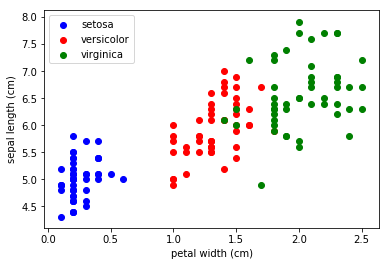

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

## Loading your own dataset


In [68]:
import os
import pandas as pd

titanic = pd.read_csv(os.path.join('data', 'titanic.csv'))
print(titanic.columns)


labels = titanic.survived.values
features = titanic[['body', 'sex', 'age', 'parch', 'fare', 'embarked']]


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')



# Scikit-learn with real world data: Preprocessing

### Binning of Categorical Data

### Converting Categorical Values to Numerical Values (Binary Values)

In [69]:
# Note that pandas dummies are the same as scikit-learn one-hot encoding
pd.get_dummies(features).head()

body      age  parch      fare  sex_female  sex_male  embarked_C  \
0    NaN  29.0000      0  211.3375           1         0           0   
1    NaN   0.9167      2  151.5500           0         1           0   
2    NaN   2.0000      2  151.5500           1         0           0   
3  135.0  30.0000      2  151.5500           0         1           0   
4    NaN  25.0000      2  151.5500           1         0           0   

   embarked_Q  embarked_S  
0           0           1  
1           0           1  
2           0           1  
3           0           1  
4           0           1

In [70]:
features_dummies = pd.get_dummies(features, columns=['parch', 'sex', 'embarked'])
features_dummies.head(n=9)

body      age      fare  parch_0  parch_1  parch_2  parch_3  parch_4  \
0    NaN  29.0000  211.3375        1        0        0        0        0   
1    NaN   0.9167  151.5500        0        0        1        0        0   
2    NaN   2.0000  151.5500        0        0        1        0        0   
3  135.0  30.0000  151.5500        0        0        1        0        0   
4    NaN  25.0000  151.5500        0        0        1        0        0   
5    NaN  48.0000   26.5500        1        0        0        0        0   
6    NaN  63.0000   77.9583        1        0        0        0        0   
7    NaN  39.0000    0.0000        1        0        0        0        0   
8    NaN  53.0000   51.4792        1        0        0        0        0   

   parch_5  parch_6  parch_9  sex_female  sex_male  embarked_C  embarked_Q  \
0        0        0        0           1         0           0           0   
1        0        0        0           0         1           0           0   
2        0        0        0           1         0           0           0   
3        0        0        0           0         1           0           0   
4        0        0        0           1         0           0           0   
5        0        0        0           0         1           0           0   
6        0        0        0           1         0           0           0   
7        0        0        0           0         1           0           0   
8        0        0        0           1         0           0           0   

   embarked_S  
0           1  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1

In [71]:
data = features_dummies.values

data

array([[      nan,   29.    ,  211.3375, ...,    0.    ,    0.    ,    1.    ],
       [      nan,    0.9167,  151.55  , ...,    0.    ,    0.    ,    1.    ],
       [      nan,    2.    ,  151.55  , ...,    0.    ,    0.    ,    1.    ],
       ..., 
       [ 304.    ,   26.5   ,    7.225 , ...,    1.    ,    0.    ,    0.    ],
       [      nan,   27.    ,    7.225 , ...,    1.    ,    0.    ,    0.    ],
       [      nan,   29.    ,    7.875 , ...,    0.    ,    0.    ,    1.    ]])

### Handling missing values

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer


imp = Imputer(strategy="median") # can supply different strategies
imp.fit(data)
train_data = imp.transform(data)


print("All the training data", train_data)
print("Age", train_data[:,1])


All the training data [[ 155.       29.      211.3375 ...,    0.        0.        1.    ]
 [ 155.        0.9167  151.55   ...,    0.        0.        1.    ]
 [ 155.        2.      151.55   ...,    0.        0.        1.    ]
 ..., 
 [ 304.       26.5       7.225  ...,    1.        0.        0.    ]
 [ 155.       27.        7.225  ...,    1.        0.        0.    ]
 [ 155.       29.        7.875  ...,    0.        0.        1.    ]]
Age [ 29.       0.9167   2.     ...,  26.5     27.      29.    ]


### Scaling features 

In [84]:
from sklearn import preprocessing

age_data = train_data[:,1]

processed_age_data = preprocessing.scale(age_data)

print("The mean of the original age data is", age_data.mean(axis=0))
print("The std  of the original age data is", age_data.std(axis=0))
print()

print("The mean of the transformed age data is", processed_age_data.mean(axis=0))
print("The std  of the transformed age data is", processed_age_data.std(axis=0))


The mean of the original age data is 29.5031831169
The std  of the original age data is 12.9003159302

The mean of the transformed age data is -1.30275215113e-16
The std  of the transformed age data is 1.0


# Creating a Test-Train Split
Still the Titanic dataset

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=0)

#Again fill in missing values
imp = Imputer()
imp.fit(train_data)
train_data_finite = imp.transform(train_data)
test_data_finite = imp.transform(test_data)

# Algorithms we know in scikit-learn
### Most Common Label Classifier

Scikit learn calls this a "dummy" classifier. Easy "baseline" for learning.

In [ ]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier('most_frequent')
clf.fit(train_data_finite, train_labels)
print("Prediction accuracy: %f" % clf.score(test_data_finite, test_labels))

### SVM

More info at: http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=4000)
clf.fit(train_data_finite, train_labels)
LinearSVC()

print(clf.coef_)
print(clf.intercept_)
print(clf.score(test_data_finite, test_labels))


## Cross Validating SVM
From http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Set the parameters by cross-validation
tuned_parameters = [{'C': [10, 100, 1000, 5000], 'gamma': [1e-4, 1e-5, 1e-6]}]

print("# Tuning hyper-parameters for accuracy")
print()

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                   scoring='accuracy')
clf.fit(train_data_finite, train_labels)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=2000)
clf.fit(train_data_finite, train_labels)
Perceptron(max_iter=1000, tol=0.001)

print(clf.coef_)
print(clf.intercept_)
print(clf.score(test_data_finite, test_labels))


### Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(train_data_finite, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data_finite, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

We can try using a different criterion to build the tree.

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(train_data_finite, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data_finite, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

Let's try limiting the depth...

In [ ]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(train_data_finite, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data_finite, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

... what?
Let's visualize our tree: http://scikit-learn.org/stable/modules/tree.html

In [ ]:
clf.tree_.__getstate__()

In [ ]:
#http://scikit-learn.org/stable/modules/tree.html
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

### Other algorithms we haven't covered in class

- Random forests
- Logistic Regression
- Naive Bayes
- Adaboost
- Multiclass classifiers
- K Nearest Neighbors
- Kernels

### Links!

lots of scikit demos: https://github.com/amueller/scipy-2016-sklearn/tree/master/notebooks

svm documentation: http://scikit-learn.org/stable/modules/svm.html

decision tree documentation: http://scikit-learn.org/stable/modules/tree.html

perceptron documentation: http://scikit-learn.org/stable/modules/linear_model.html#perceptron

graphing trees: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

cross-validation parameter search documentation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py